In [ ]:
!pip install csvkit
!pip install praw

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csvkit
import praw
import textblob
import nltk
import seaborn as sn
import datetime

reddit = praw.Reddit(
    #Insert token data
)




In [ ]:
def addcolumns(df1):
  day=[]
  month=[]
  year=[]
  hour=[]
  for i in list(df1['times']):
    day.append(datetime.datetime.fromtimestamp(i).day)
    hour.append(datetime.datetime.fromtimestamp(i).hour)
    year.append(datetime.datetime.fromtimestamp(i).year)  
    month.append(datetime.datetime.fromtimestamp(i).month)

  df1['hour']=hour
  df1['day']=day
  df1['month']=month
  df1['year']=year

  website=[]
  for i in df1.links:
    website.append(i.split("//")[-1].split("/")[0])
  df1['website']=website

  from textblob import TextBlob
  polarity=[]
  subjectivity=[]
  for i in df1.itertuples():
    texte=i.title
    if isinstance(i.selftext,str):
      texte=' '.join([texte,i.selftext])
    polarity.append(TextBlob(texte).sentiment.polarity)
    subjectivity.append(TextBlob(texte).sentiment.subjectivity)
  df1['subjectivity']=subjectivity
  df1['polarity']=polarity

  #b=[i.upvote_ratio for i in reddit.subreddit('SquaredCircle').top('all',limit=2000)]

  #df1['ratio']=b

  d=[mystring.replace('\n', ' ').replace('\r', '') for mystring in df1.selftext]

  df1['selftext']=d



  titles=list(df1.title)

  textetitles=' '.join(map(str,titles))

  website=[]
  for i in df1.links:
    website.append(i.split("//")[-1].split("/")[0])
  df1['website']=website

  polarity=[]
  subjectivity=[]
  for i in df1['title']:
    polarity.append(TextBlob(i).sentiment.polarity)
    subjectivity.append(TextBlob(i).sentiment.subjectivity)
  df1['subjectivity']=subjectivity
  df1['polarity']=polarity
  return df1

In [ ]:
def extractsub(subname,subcount,rato=0):
  idp=[]
  title=[]
  score=[]
  times=[]
  comm=[]
  auth=[]
  subreddit=[]
  links=[]
  selftext=[]
  flair=[]
  if rato==1:
    ratio=[]
  s=reddit.subreddit(subname).top('all',limit=subcount)
  for i in s:
    idp.append(i.id)
    title.append(i.title)
    score.append(i.score)
    times.append(i.created_utc)
    comm.append(i.num_comments)
    auth.append(i.author)
    subreddit.append(i.subreddit.display_name)
    links.append(i.url)
    selftext.append(i.selftext)
    flair.append(i.link_flair_text)
    if rato==1:
      ratio.append(i.upvote_ratio)

  if rato==0:
    f = {'id': idp, 'title': title, 'score': score,'times': times,'comm': comm,'auth': auth,'links':links,'selftext':selftext,'flair':flair}
  if rato==1:
    f = {'id': idp, 'title': title, 'score': score,'times': times,'comm': comm,'auth': auth,'links':links,'selftext':selftext, 'ratio':ratio}
  df1=pd.DataFrame(data=f)
  return df1

In [ ]:
def printdict(words):
  ranko={}
  for i in set(words):
    ranko[i]=0
  for i in words:
    ranko[i]+=1
  word10=[k for k, v in sorted(ranko.items(), key=lambda item: item[1]) if v>10]
  freq=[v for k, v in sorted(ranko.items(), key=lambda item: item[1]) if v>10]

  f={'Word':word10,'Times':freq}
  f=pd.DataFrame(f)

  f=f.sort_values(by=['Times'],ascending=False)
  for line in f.itertuples():
    print(line.Word,' : ',line.Times)
  return f

In [ ]:
def getwords(df1):
  tijoined=' '.join(df1.title)
  nltk.download('stopwords')
  words=tijoined.split()
  words=[word.lower() for word in words]
  import string
  table = str.maketrans('', '', string.punctuation)
  words = [w.translate(table) for w in words]
  words = [word for word in words if word.isalpha()]
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  return words

In [ ]:
def analyzedata(df1):
  
  sn.heatmap(df1.corr(),annot=True)

  df1.groupby('year')['score'].mean()
  plt.scatter(df1['score'],df1['comm'],c=df1['year'],)


  k=df1.groupby('website')['id'].describe()
  k[k['count']>7].sort_values(by=['count'],ascending=False)

In [ ]:
df1=extractsub('AskScience',1000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
would  :  113
like  :  76
water  :  62
one  :  53
people  :  50
earth  :  49
know  :  46
could  :  45
get  :  44
body  :  39
years  :  38
light  :  37
time  :  36
much  :  36
space  :  36
make  :  35
black  :  33
many  :  32
sun  :  32
possible  :  31
see  :  30
human  :  29
different  :  28
around  :  28
animals  :  28
humans  :  26
nuclear  :  25
planet  :  25
go  :  25
take  :  25
long  :  24
us  :  24
cant  :  24
actually  :  23
able  :  23
use  :  22
someone  :  21
made  :  21
universe  :  21
ama  :  20
anything  :  20
blood  :  19
way  :  19
need  :  19
come  :  18
askscience  :  18
point  :  18
hole  :  18
year  :  18
change  :  17
still  :  17
dark  :  17
back  :  17
brain  :  17
dont  :  17
size  :  17
energy  :  17
temperature  :  16
work  :  16
keep  :  16
day  :  16
old  :  16
system  :  16
ever  :  15
new  :  15
sound  :  15
air  :  15
skin  :  15
deep  :  15
put 

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>


14
matter  :  14
affect  :  14
first  :  14
single  :  14
holes  :  14
really  :  14
ocean  :  14
im  :  14
oxygen  :  14
eyes  :  14
radiation  :  14
life  :  14
planets  :  14
even  :  14
happens  :  14
moon  :  14
become  :  13
small  :  13
similar  :  13
scientists  :  13
speed  :  13
flu  :  13
rather  :  13
red  :  13
completely  :  13
amount  :  13
high  :  13
say  :  13
feel  :  13
every  :  13
sleep  :  12
mean  :  12
person  :  12
using  :  12
species  :  12
grow  :  12
star  :  12
effect  :  12
sea  :  12
find  :  12
reason  :  12
instead  :  12
without  :  12
common  :  12
ago  :  11
ask  :  11
million  :  11
happening  :  11
something  :  11
well  :  11
gravity  :  11
number  :  11
cold  :  11
lose  :  11


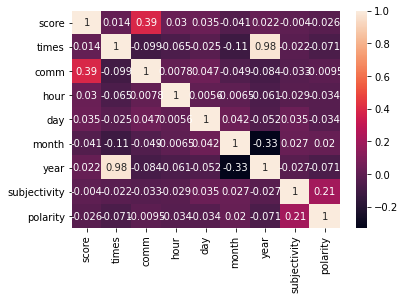

In [ ]:
df1=addcolumns(df1)
analyzedata(df1)
words=getwords(df1)
wordsdf=printdict(words)

In [ ]:
wordsdf.head(18)

,Word,Times
132,would,113
131,like,76
130,water,62
129,one,53
128,people,50
127,earth,49
126,know,46
125,could,45
124,get,44
123,body,39


In [ ]:
df1.head()

,id,title,score,times,comm,auth,links,selftext,flair,hour,day,month,year,website,subjectivity,polarity
0,7etmk7,Help us fight for net neutrality!,83382,1.511380e+09,1187,MockDeath,https://www.reddit.com/r/askscience/comments/7...,The ability to browse the internet is at risk....,None,19,22,11,2017,www.reddit.com,0.00,0.00
1,84auzr,Stephen Hawking megathread,65831,1.521004e+09,1659,AskScienceModerator,https://www.reddit.com/r/askscience/comments/8...,"We were sad to learn that noted physicist, cos...",Physics,5,14,3,2018,www.reddit.com,0.00,0.00
2,3by2nk,A message to our users,39285,1.435891e+09,1193,MockDeath,https://www.reddit.com/r/askscience/comments/3...,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Today in AskScie...,Meta,2,3,7,2015,www.reddit.com,0.00,0.00
3,7yx524,Why is it that during winter it's not uncommon...,37675,1.519144e+09,975,This31415926535,https://www.reddit.com/r/askscience/comments/7...,I live in the USA Midwest,Earth Sciences,16,20,2,2018,www.reddit.com,0.77,-0.12
4,ahyapf,If we could travel at 99.9% the speed of light...,34354,1.547996e+09,3085,GPL89,https://www.reddit.com/r/askscience/comments/a...,,Physics,14,20,1,2019,www.reddit.com,0.70,0.40


In [ ]:
df2=df1.drop(['selftext','links'],axis=1)
df2.head()
#df2.to_csv('fh.csv')

,id,title,score,times,comm,auth,flair,hour,day,month,year,website,subjectivity,polarity
0,7etmk7,Help us fight for net neutrality!,83382,1.511380e+09,1187,MockDeath,None,19,22,11,2017,www.reddit.com,0.00,0.00
1,84auzr,Stephen Hawking megathread,65831,1.521004e+09,1659,AskScienceModerator,Physics,5,14,3,2018,www.reddit.com,0.00,0.00
2,3by2nk,A message to our users,39285,1.435891e+09,1193,MockDeath,Meta,2,3,7,2015,www.reddit.com,0.00,0.00
3,7yx524,Why is it that during winter it's not uncommon...,37675,1.519144e+09,975,This31415926535,Earth Sciences,16,20,2,2018,www.reddit.com,0.77,-0.12
4,ahyapf,If we could travel at 99.9% the speed of light...,34354,1.547996e+09,3085,GPL89,Physics,14,20,1,2019,www.reddit.com,0.70,0.40


In [ ]:
df1=extractsub('dankmemes',100)
df1=addcolumns(df1)
df1.head()

,id,title,score,times,comm,auth,links,selftext,flair,hour,day,month,year,website,subjectivity,polarity
0,aj49zn,Stefán Karl Stefánsson is the Meme of the Year...,179547,1.548276e+09,2292,ELFAHBEHT_SOOP,https://i.imgur.com/th7A2XW.jpg,,None,20,23,1,2019,i.imgur.com,0.0,0.0
1,d6zfsp,Didn't Disappoint.,164503,1.569006e+09,604,Tutankhhamun,https://i.redd.it/6az7dr5fqsn31.jpg,,None,18,20,9,2019,i.redd.it,0.0,0.0
2,bzra7z,Hopefully he doesn’t fail me...,151490,1.560346e+09,1535,Legend534,https://i.redd.it/6czrmutdhx331.jpg,,lmao posted this during class,13,12,6,2019,i.redd.it,0.3,-0.5
3,b4jykl,My grades: F,147288,1.553353e+09,2428,Subcivil,https://i.redd.it/kslk7bp3svn21.jpg,,None,14,23,3,2019,i.redd.it,0.0,0.0
4,d398dx,Hasbruh moment,145742,1.568301e+09,1432,chems_such_as_bleach,https://i.redd.it/1y8xpb2xh6m31.jpg,,None,15,12,9,2019,i.redd.it,0.0,0.0


In [ ]:
listofsubs=['dankmemes','askreddit','dataisbeautiful','nba','datasets','iama','science','explainlikeimfive','showerthoughts','listentothis','books']

In [ ]:
for i in listofsubs:
  print(i)
  df1=extractsub(i,2000)
  df1.to_csv('{}.csv'.format(i))